In [30]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [31]:
df = pd.read_csv('archive/mnist_train.csv')

In [32]:
df.head()

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [33]:
df.shape

(60000, 785)

In [34]:
X = df.iloc[:,1:]
y = df.iloc[:,0]

In [35]:
X

,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,1x10,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [36]:
y

0        5
1        0
2        4
3        1
4        9
        ..
59995    8
59996    3
59997    5
59998    6
59999    8
Name: label, Length: 60000, dtype: int64

In [37]:
X = X.astype('float32')
y = y.astype('float32')

In [38]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [39]:
X_train = X.values
y_train = y.values
X_train = X_train.reshape(X_train.shape[0],28,28,1)
X_train/=255

In [40]:
input_shape = (28,28,1)

In [41]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Conv2D,Dropout,Flatten, MaxPooling2D

In [42]:
model = Sequential()
model.add(Conv2D(filters=32, kernel_size=(3,3),activation = 'relu' ,input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))
model.add(Conv2D(filters=32, kernel_size=(3,3),activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2),strides=2))

model.add(Flatten()) # Flattening the 2D arrays for fully connected layers

model.add(Dense(128, activation=tf.nn.relu))
model.add(Dense(10,activation=tf.nn.softmax))

model.compile(optimizer='adam', 
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

model.fit(x=X_train,y=y_train, epochs=15)

Epoch 1/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.1427 - accuracy: 0.9564
Epoch 2/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0485 - accuracy: 0.9851
Epoch 3/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0341 - accuracy: 0.9886
Epoch 4/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0259 - accuracy: 0.9918
Epoch 5/15
1875/1875 [==============================] - 20s 10ms/step - loss: 0.0193 - accuracy: 0.9936
Epoch 6/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0152 - accuracy: 0.9950
Epoch 7/15
1875/1875 [==============================] - 20s 11ms/step - loss: 0.0125 - accuracy: 0.9956
Epoch 8/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0115 - accuracy: 0.9961
Epoch 9/15
1875/1875 [==============================] - 19s 10ms/step - loss: 0.0081 - accuracy: 0.9972
Epoch 10/15
1875/1875 [==============================] - 19s 10m

In [43]:
model.save('digitRecognization.h5')

In [44]:
df_test = pd.read_csv('archive/mnist_test.csv')

In [45]:
df_test.shape

(10000, 785)

In [46]:
X_test = df_test.iloc[:,1:]
y_test = df_test.iloc[:,0]
X_test = X_test.astype('float32')
y_test = y_test.astype('float32')

In [47]:
X_test = X_test.values
y_test = y_test.values
X_test = X_test.reshape(X_test.shape[0],28,28,1)
X_test/=255

Prediction = 1
Actual = 1


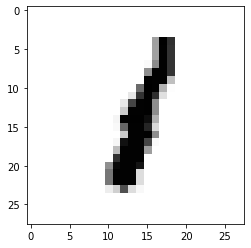

In [67]:
idx = 89
img = X_test[idx]
pred = model.predict(img.reshape(1,28,28,1)).argmax()
Y = y_test[idx]
print("Prediction = " + str(pred))
print("Actual = "+ str(int(Y)))

plt.imshow(img.reshape(28,28),cmap='Greys')